In [14]:
import pandas as pd
import numpy as np

# wybór cech - k-najlepszych sąsiadów
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# pomiary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from statistics import mean

# algorytmy
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# wykresy
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
# get data
data = pd.read_csv('..\\diabetes.csv')

# preprocess data
print(data.head(10))
features = data.drop(["Outcome"], axis=1)
target = data["Outcome"]

# Konwersja danych na dane kategoryzujące przez konwersje danych na liczby calkowite
features = features.astype(int)

chi2_selector = SelectKBest(chi2, k=4)
features_kbest = chi2_selector.fit_transform(features, target)

print("Początkowa liczba cech:", features.shape[1])
print("Liczba cech po redukcji:", features_kbest.shape[1])
features_kbest[:5]
# print(features)
# print(len(features_kbest))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   2

array([[148,   0,  33,  50],
       [ 85,   0,  26,  31],
       [183,   0,  23,  32],
       [ 89,  94,  28,  21],
       [137, 168,  43,  33]])

In [16]:
tries = 10
log_reg_accuracy = []
x = features
y = target
for i in range(tries):
    X_train, X_test, y_train, y_test = train_test_split(features, target)

    l_reg = LogisticRegression(solver='lbfgs', max_iter=250)
    l_reg.fit(X_train, y_train)
    y_pred = l_reg.predict(X_test)  # przewidujemy na podstawie X_test
    log_reg_accuracy.append(accuracy_score(y_test, y_pred) * 100.0)


Logistic regresssion accuracies: , [76.5625, 76.04166666666666, 74.47916666666666, 74.47916666666666, 75.0, 80.72916666666666, 75.0, 76.04166666666666, 75.0, 78.125]
Mean logistic regression accuracy:  76.14583333333333


In [17]:
# jądro svc
svc_linear_accuracy = []
svc = svm.SVC(kernel="linear", C=0.4)
for i in range(tries):
    svc.fit(x, y)
    y_pred = svc.predict(x)
    svc_linear_accuracy.append(accuracy_score(y_pred, y) * 100.0)

svc_rbf_accuracy = []
svc = svm.SVC(kernel="rbf", C=0.4)
for i in range(tries):
    svc.fit(x, y)
    y_pred = svc.predict(x)
    svc_rbf_accuracy.append(accuracy_score(y_pred, y) * 100.0)


In [20]:
# k najbliższych sąsiadów

knn_accuracy = []
for i in range(tries):
    X_train, X_test, y_train, y_test = train_test_split(x, y)

    neigh = KNeighborsClassifier(n_neighbors=10)
    neigh.fit(X_train, y_train)
    knn_accuracy.append(neigh.score(X_test,y_test) * 100.0)


Mean accuracies:
Logistic regression:  76.14583333333333
Linear kernel:  76.69270833333334
RBF kernel 76.04166666666666
KNN Accuracy:  75.41666666666667


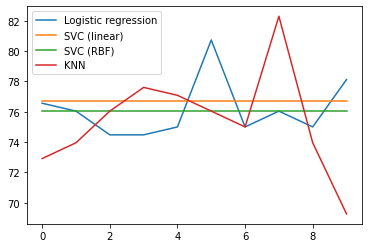

In [21]:

print("Mean accuracies:" )
print("Logistic regression: ", mean(log_reg_accuracy))
print("Linear kernel: ", mean(svc_linear_accuracy))
print("RBF kernel", mean(svc_rbf_accuracy))
print("KNN Accuracy: ", mean(knn_accuracy))
ax_log_reg = plt.plot(list(range(tries)), log_reg_accuracy, label="Logistic regression")
ax_svc_linear = plt.plot(list(range(tries)), svc_linear_accuracy, label="SVC (linear)")
ax_svc_rbf = plt.plot(list(range(tries)), svc_rbf_accuracy, label="SVC (RBF)")
ax_svc_knn = plt.plot(list(range(tries)), knn_accuracy, label="KNN")
plt.legend()
plt.show()